In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-car-models-india/newCarsIndia.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load Data Set

In [4]:
df_new_car_india = pd.read_csv('/kaggle/input/new-car-models-india/newCarsIndia.csv')

In [5]:
df_new_car_india.head(5)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10)
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,8.5
1,Hyundai Grand i10 Nios,Compact Hatchback,20.2 - 26.2 Km/l,"AMT,Manual","Petrol,Petrol+CNG,Diesel",₹ 5.3 - 8.51 L,8.5
2,Maruti Suzuki Alto 800,Entry Hatchback,24.7 - 31.39 Km/l,Manual,"Petrol,Petrol+CNG",₹ 3.39 - 5.03 L,6.6
3,Tata Punch,Compact SUV,NaN,"AMT,Manual",Petrol,₹ 5.83 - 9.49 L,na
4,MG Hector,SUV,13.96 - 17.4 Km/l,"Automatic,Manual","Petrol,Diesel,Hybrid",₹ 13.5 - 19.36 L,7.5


In [6]:
df_new_car_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Car              255 non-null    object
 1   Style            255 non-null    object
 2   Range            244 non-null    object
 3   Transmission     255 non-null    object
 4   VehicleType      255 non-null    object
 5   PriceRange       255 non-null    object
 6   Rating(outof10)  255 non-null    object
dtypes: object(7)
memory usage: 14.1+ KB


In [7]:
# Exploitory Data Analysis

In [8]:
len(df_new_car_india.Car.unique()) #Total Number of unique model

255

In [9]:
len(df_new_car_india.Style.unique()) #Total Number of unique style of car

31

In [10]:
len(df_new_car_india.Transmission.unique()) #Total Number of Transmission Type

5

In [11]:
len(df_new_car_india.VehicleType.unique()) #Total Number of Vehicle Type

15

<AxesSubplot:>

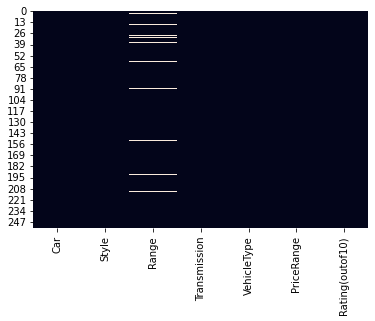

In [12]:
sns.heatmap(df_new_car_india.isna(),cbar=False)

In [13]:
df_new_car_india.Range.isna()

0      False
1      False
2      False
3       True
4      False
       ...  
250    False
251    False
252    False
253    False
254    False
Name: Range, Length: 255, dtype: bool

In [14]:
df_new_car_india[df_new_car_india.Range.isna()]

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10)
3,Tata Punch,Compact SUV,NaN,"AMT,Manual",Petrol,₹ 5.83 - 9.49 L,na
15,Mahindra XUV700,SUV,NaN,"Automatic,Manual","Petrol,Diesel",₹ 13.18 - 24.58 L,na
28,MG Astor,Compact SUV,NaN,"Automatic,Manual",Petrol,₹ 9.78 - 16.78 L,na
31,Audi Q7,Premium Fullsize SUV,NaN,Automatic,Petrol,₹ 82.49 - 89.9 L,8.4
37,Toyota Hilux,SUV,NaN,"Automatic,Manual",Diesel,₹ 33.99 - 36.8 L,na
59,Kia Carens,Subcompact MPV,NaN,"Automatic,Manual","Petrol,Diesel",₹ 9.6 - 17.7 L,na
91,Force Motors Gurkha,SUV,NaN,Manual,Diesel,₹ 13.59 L,6.1
117,Mercedes-AMG A 45,Luxury Hatchback,NaN,Automatic,Petrol,₹ 81.5 L,na
152,Mercedes-AMG GLA 35,Luxury SUV,NaN,Automatic,Petrol,₹ 57.28 L,na
191,Isuzu MU-X,SUV,NaN,Automatic,Diesel,₹ 33.23 - 35.19 L,7.3


In [15]:
df_new_car_india[df_new_car_india['Rating(outof10)'] == 'na']

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10)
3,Tata Punch,Compact SUV,NaN,"AMT,Manual",Petrol,₹ 5.83 - 9.49 L,na
11,Mahindra Thar,Compact SUV,13 - 15.2 Km/l,"Automatic,Manual","Petrol,Diesel",₹ 13.53 - 16.03 L,na
15,Mahindra XUV700,SUV,NaN,"Automatic,Manual","Petrol,Diesel",₹ 13.18 - 24.58 L,na
23,Hyundai Alcazar,Compact SUV,14.2 - 20.4 Km/l,"Automatic,Manual","Petrol,Diesel",₹ 16.34 - 20.15 L,na
26,Toyota Urban Cruiser,Subcompact SUV,17.03 - 18.76 Km/l,"Automatic,Manual",Petrol,₹ 8.88 - 11.58 L,na
...,...,...,...,...,...,...,...
245,Audi RS E-Tron GT,Premium Midsize SUV,401 Km/Full Charge,Automatic,Electric,₹ 2.05 Cr,na
248,BMW X3 M,Premium Midsize SUV,9.12 Km/l,Automatic,Petrol,₹ 1 Cr,na
251,Ferrari 812 Superfast,Premium Sports Coupe,6.7 Km/l,Automatic,Petrol,₹ 5.2 Cr,na
253,Ferrari Portofino,Premium Sports Coupe,10 Km/l,Automatic,Petrol,₹ 3.5 Cr,na


<AxesSubplot:xlabel='Style', ylabel='count'>

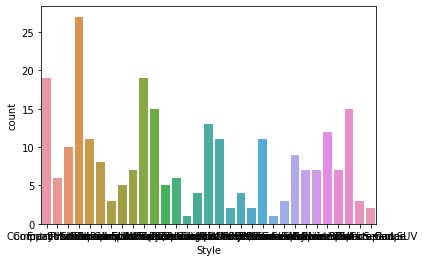

In [16]:
sns.countplot(x=df_new_car_india.Style,data=df_new_car_india)

<AxesSubplot:xlabel='Transmission', ylabel='count'>

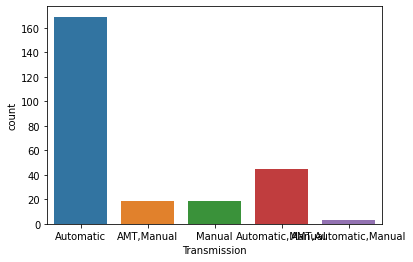

In [17]:
sns.countplot(x=df_new_car_india.Transmission,data=df_new_car_india)

<AxesSubplot:xlabel='VehicleType', ylabel='count'>

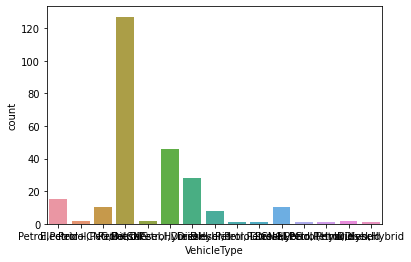

In [18]:
sns.countplot(x=df_new_car_india.VehicleType,data=df_new_car_india)

In [19]:
# Data Preprocesing

In [20]:
df_new_car_india_copy = df_new_car_india.copy()

In [21]:
df_new_car_india_copy['Company'] = df_new_car_india_copy.Car.apply(lambda x : x.split(' ')[0])

In [22]:
df_new_car_india_copy['Model'] = df_new_car_india_copy.Car.apply(lambda x : x.split(' ')[1])

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [24]:
df_new_car_india_copy['Style_New'] = label_encoder.fit_transform(df_new_car_india_copy.Style)

In [25]:
transmission_values = []
transmission_type = df_new_car_india_copy.Transmission.unique()
for transmission in transmission_type:
    transmission = transmission.split(',')
    for unique_transmission in transmission:
        if unique_transmission not in transmission_values:
            transmission_values.append(unique_transmission)        

In [26]:
for transmission_value in transmission_values:
    df_new_car_india_copy[transmission_value] = df_new_car_india_copy.Transmission.apply(lambda x: 1 if transmission_value in x else 0)

In [27]:
df_new_car_india_copy.head(5)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10),Company,Model,Style_New,Automatic,AMT,Manual
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,8.5,Tata,Nexon,2,1,0,0
1,Hyundai Grand i10 Nios,Compact Hatchback,20.2 - 26.2 Km/l,"AMT,Manual","Petrol,Petrol+CNG,Diesel",₹ 5.3 - 8.51 L,8.5,Hyundai,Grand,0,0,1,1
2,Maruti Suzuki Alto 800,Entry Hatchback,24.7 - 31.39 Km/l,Manual,"Petrol,Petrol+CNG",₹ 3.39 - 5.03 L,6.6,Maruti,Suzuki,5,0,0,1
3,Tata Punch,Compact SUV,NaN,"AMT,Manual",Petrol,₹ 5.83 - 9.49 L,na,Tata,Punch,2,0,1,1
4,MG Hector,SUV,13.96 - 17.4 Km/l,"Automatic,Manual","Petrol,Diesel,Hybrid",₹ 13.5 - 19.36 L,7.5,MG,Hector,25,1,0,1


In [28]:
vehicle_type_values = []
vehicle_type = df_new_car_india_copy.VehicleType.unique()
for vehicle in vehicle_type:
    vehicle = vehicle.split(',')
    for unique_vehicle in vehicle:
        if unique_vehicle not in vehicle_type_values:
            vehicle_type_values.append(unique_vehicle)
            
print(vehicle_type_values)

['Electric', 'Petrol', 'Petrol+CNG', 'Diesel', 'Hybrid', 'Petrol+LPG']


In [29]:
for vehicle_type_value in vehicle_type_values:
    df_new_car_india_copy[vehicle_type_value] = df_new_car_india_copy.VehicleType.apply(lambda x: 1 if vehicle_type_value in x else 0)

In [30]:
df_new_car_india_copy.head(5)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10),Company,Model,Style_New,Automatic,AMT,Manual,Electric,Petrol,Petrol+CNG,Diesel,Hybrid,Petrol+LPG
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,8.5,Tata,Nexon,2,1,0,0,1,0,0,0,0,0
1,Hyundai Grand i10 Nios,Compact Hatchback,20.2 - 26.2 Km/l,"AMT,Manual","Petrol,Petrol+CNG,Diesel",₹ 5.3 - 8.51 L,8.5,Hyundai,Grand,0,0,1,1,0,1,1,1,0,0
2,Maruti Suzuki Alto 800,Entry Hatchback,24.7 - 31.39 Km/l,Manual,"Petrol,Petrol+CNG",₹ 3.39 - 5.03 L,6.6,Maruti,Suzuki,5,0,0,1,0,1,1,0,0,0
3,Tata Punch,Compact SUV,NaN,"AMT,Manual",Petrol,₹ 5.83 - 9.49 L,na,Tata,Punch,2,0,1,1,0,1,0,0,0,0
4,MG Hector,SUV,13.96 - 17.4 Km/l,"Automatic,Manual","Petrol,Diesel,Hybrid",₹ 13.5 - 19.36 L,7.5,MG,Hector,25,1,0,1,0,1,0,1,1,0


In [31]:
df_new_car_india_copy['UpperPriceRange(Lacs)'] = df_new_car_india_copy.PriceRange.apply(lambda x: x.split(' ')).apply(lambda x:float(x[-2])*100 if x[-1] == 'Cr' else x[-2])

In [32]:
df_new_car_india_copy['LowerPriceRange(Lacs)'] = df_new_car_india_copy.PriceRange.apply(lambda x: x.split(' ')).apply(lambda x:float(x[1]) * 100 if x[2] == 'Cr' else x[1])

In [33]:
df_new_car_india_copy.head(5)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10),Company,Model,Style_New,...,AMT,Manual,Electric,Petrol,Petrol+CNG,Diesel,Hybrid,Petrol+LPG,UpperPriceRange(Lacs),LowerPriceRange(Lacs)
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,8.5,Tata,Nexon,2,...,0,0,1,0,0,0,0,0,17.4,13.99
1,Hyundai Grand i10 Nios,Compact Hatchback,20.2 - 26.2 Km/l,"AMT,Manual","Petrol,Petrol+CNG,Diesel",₹ 5.3 - 8.51 L,8.5,Hyundai,Grand,0,...,1,1,0,1,1,1,0,0,8.51,5.3
2,Maruti Suzuki Alto 800,Entry Hatchback,24.7 - 31.39 Km/l,Manual,"Petrol,Petrol+CNG",₹ 3.39 - 5.03 L,6.6,Maruti,Suzuki,5,...,0,1,0,1,1,0,0,0,5.03,3.39
3,Tata Punch,Compact SUV,NaN,"AMT,Manual",Petrol,₹ 5.83 - 9.49 L,na,Tata,Punch,2,...,1,1,0,1,0,0,0,0,9.49,5.83
4,MG Hector,SUV,13.96 - 17.4 Km/l,"Automatic,Manual","Petrol,Diesel,Hybrid",₹ 13.5 - 19.36 L,7.5,MG,Hector,25,...,0,1,0,1,0,1,1,0,19.36,13.5


In [34]:
average_ratings = df_new_car_india_copy['Rating(outof10)'].apply(lambda x: float(0) if x == 'na' else float(x)).mean()
average_ratings

5.683921568627452

In [35]:
df_new_car_india_copy['Rating(outof10)'] = df_new_car_india_copy['Rating(outof10)'].apply(lambda x: average_ratings if x == 'na' else x)

In [36]:
df_new_car_india_copy.dropna(inplace=True)

In [37]:
df_new_car_india_copy.Range.apply(lambda x: x.split(' ') if x is not np.NaN else [0,0])

0      [312, Km/Full, Charge]
1       [20.2, -, 26.2, Km/l]
2      [24.7, -, 31.39, Km/l]
4      [13.96, -, 17.4, Km/l]
5                [21.5, Km/l]
                ...          
250                 [8, Km/l]
251               [6.7, Km/l]
252               [9.5, Km/l]
253                [10, Km/l]
254    [270, Km/Full, Charge]
Name: Range, Length: 244, dtype: object

In [38]:
df_new_car_india_copy['Range(Km)PerFullCharge'] = df_new_car_india_copy.Range.apply(lambda x: x.split(' ') if x is not np.NaN else [0,0]).apply(lambda x: float(x[0]) if x[-1] == 'Charge' else float(0))

In [39]:
df_new_car_india_copy['Upper(Km/l)Range'] = df_new_car_india_copy.Range.apply(lambda x: x.split(' ') if x is not np.NaN else [0,0]).apply(lambda x: float(x[-2]) if x[-1] == 'Km/l' else float(0))

In [40]:
df_new_car_india_copy['Lower(Km/l)Range'] = df_new_car_india_copy.Range.apply(lambda x: x.split(' ') if x is not np.NaN else [0,0]).apply(lambda x: float(x[0]) if x[-1] == 'Km/l' else float(0))

In [41]:
df_new_car_india_copy.head(5)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10),Company,Model,Style_New,...,Petrol,Petrol+CNG,Diesel,Hybrid,Petrol+LPG,UpperPriceRange(Lacs),LowerPriceRange(Lacs),Range(Km)PerFullCharge,Upper(Km/l)Range,Lower(Km/l)Range
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,8.5,Tata,Nexon,2,...,0,0,0,0,0,17.4,13.99,312.0,0.00,0.00
1,Hyundai Grand i10 Nios,Compact Hatchback,20.2 - 26.2 Km/l,"AMT,Manual","Petrol,Petrol+CNG,Diesel",₹ 5.3 - 8.51 L,8.5,Hyundai,Grand,0,...,1,1,1,0,0,8.51,5.3,0.0,26.20,20.20
2,Maruti Suzuki Alto 800,Entry Hatchback,24.7 - 31.39 Km/l,Manual,"Petrol,Petrol+CNG",₹ 3.39 - 5.03 L,6.6,Maruti,Suzuki,5,...,1,1,0,0,0,5.03,3.39,0.0,31.39,24.70
4,MG Hector,SUV,13.96 - 17.4 Km/l,"Automatic,Manual","Petrol,Diesel,Hybrid",₹ 13.5 - 19.36 L,7.5,MG,Hector,25,...,1,0,1,1,0,19.36,13.5,0.0,17.40,13.96
5,Tata Nexon,Subcompact SUV,21.5 Km/l,"AMT,Automatic,Manual","Petrol,Diesel",₹ 7.4 - 13.74 L,7.8,Tata,Nexon,28,...,1,0,1,0,0,13.74,7.4,0.0,21.50,21.50


In [42]:
df_new_car_india_copy.Company.unique()

array(['Tata', 'Hyundai', 'Maruti', 'MG', 'Kia', 'Mahindra', 'Toyota',
       'Honda', 'Volkswagen', 'Nissan', 'Skoda', 'Renault', 'BMW',
       'Bajaj', 'Mercedes-Benz', 'Jeep', 'Mercedes-AMG', 'Datsun',
       'Rolls-Royce', 'Ford', 'Isuzu', 'Land', 'Jaguar', 'Audi', 'Lexus',
       'Volvo', 'Lamborghini', 'Citroen', 'Ferrari', 'MINI',
       'Mercedes-Maybach', 'Porsche', 'Aston', 'Bentley', 'Maserati',
       'BYD', 'SsangYong'], dtype=object)

In [43]:
df_new_car_india_copy['Company'] = label_encoder.fit_transform(df_new_car_india_copy.Company)

In [44]:
df_new_car_india_copy.head(5)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Rating(outof10),Company,Model,Style_New,...,Petrol,Petrol+CNG,Diesel,Hybrid,Petrol+LPG,UpperPriceRange(Lacs),LowerPriceRange(Lacs),Range(Km)PerFullCharge,Upper(Km/l)Range,Lower(Km/l)Range
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,8.5,33,Nexon,2,...,0,0,0,0,0,17.4,13.99,312.0,0.00,0.00
1,Hyundai Grand i10 Nios,Compact Hatchback,20.2 - 26.2 Km/l,"AMT,Manual","Petrol,Petrol+CNG,Diesel",₹ 5.3 - 8.51 L,8.5,11,Grand,0,...,1,1,1,0,0,8.51,5.3,0.0,26.20,20.20
2,Maruti Suzuki Alto 800,Entry Hatchback,24.7 - 31.39 Km/l,Manual,"Petrol,Petrol+CNG",₹ 3.39 - 5.03 L,6.6,22,Suzuki,5,...,1,1,0,0,0,5.03,3.39,0.0,31.39,24.70
4,MG Hector,SUV,13.96 - 17.4 Km/l,"Automatic,Manual","Petrol,Diesel,Hybrid",₹ 13.5 - 19.36 L,7.5,19,Hector,25,...,1,0,1,1,0,19.36,13.5,0.0,17.40,13.96
5,Tata Nexon,Subcompact SUV,21.5 Km/l,"AMT,Automatic,Manual","Petrol,Diesel",₹ 7.4 - 13.74 L,7.8,33,Nexon,28,...,1,0,1,0,0,13.74,7.4,0.0,21.50,21.50


In [45]:
df_new_car_india_copy.drop(columns=['Car','Style','Range','Transmission','VehicleType','PriceRange','Model'],axis=1,inplace=True)

In [46]:
df_new_car_india_copy['Model_Id'] = df_new_car_india_copy.index

In [47]:
from sklearn.neighbors import NearestNeighbors

In [48]:
nearest_neighbour = NearestNeighbors(n_neighbors=3)

In [49]:
nearest_neighbour.fit(X=df_new_car_india_copy)

NearestNeighbors(n_neighbors=3)

In [50]:
nearest_neighbour.kneighbors(X=df_new_car_india_copy[df_new_car_india_copy.Model_Id==0])

(array([[  0.        ,  42.58307055, 121.23118576]]), array([[ 0, 28, 49]]))